In [11]:
library(ggplot2); library(GGally)

In [2]:
source('../src/load_data.r')

## Data Exploration

## k-means clustering

In [ ]:
set.seed(2); data_to_cluster <- subset(wholesale_data, select = -c(Region, Channel))

In [20]:
km2 <- kmeans(data_to_cluster, 2, nstart = 20); 
data_to_cluster['km2'] <- as.factor(km2$cluster)
km2

K-means clustering with 2 clusters of sizes 375, 65

Cluster means:
      Fresh     Milk   Grocery   Frozen Detergents_Paper     Deli
1  7944.112 5151.819  7536.128 2484.131         2872.557 1214.261
2 35401.369 9514.231 10346.369 6463.092         2933.046 3316.846

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   1   1   1   2   1   1   1   1   1   1   1   2   1   2   1   1   1   1   1 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  1   1   2   2   2   1   1   1   1   2   1   1   1   2   1   1   2   1   1   2 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  2   1   1   1   1   1   1   2   1   1   1   1   2   1   2   1   1   1   1   1 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  1   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  9

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


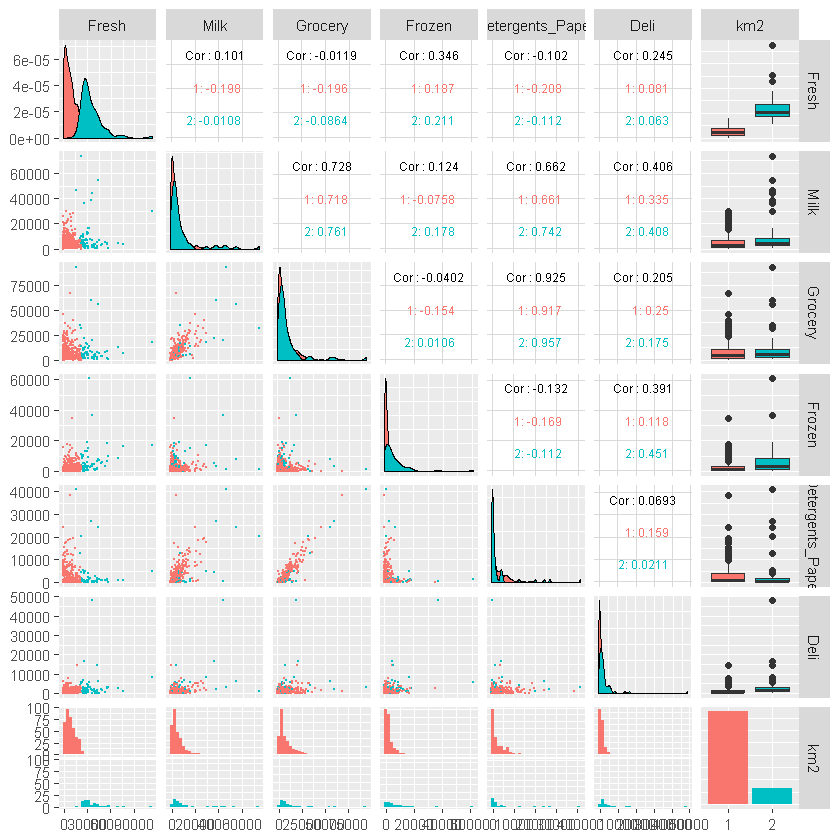

In [27]:
ggpairs(data = data_to_cluster,
        mapping = aes(color = km2),
        upper = list(continuous = wrap(ggally_cor, size = 2.5, alignPercent = 0.8)),
        lower = list(continuous = wrap(ggally_points, cex = .1))
        )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


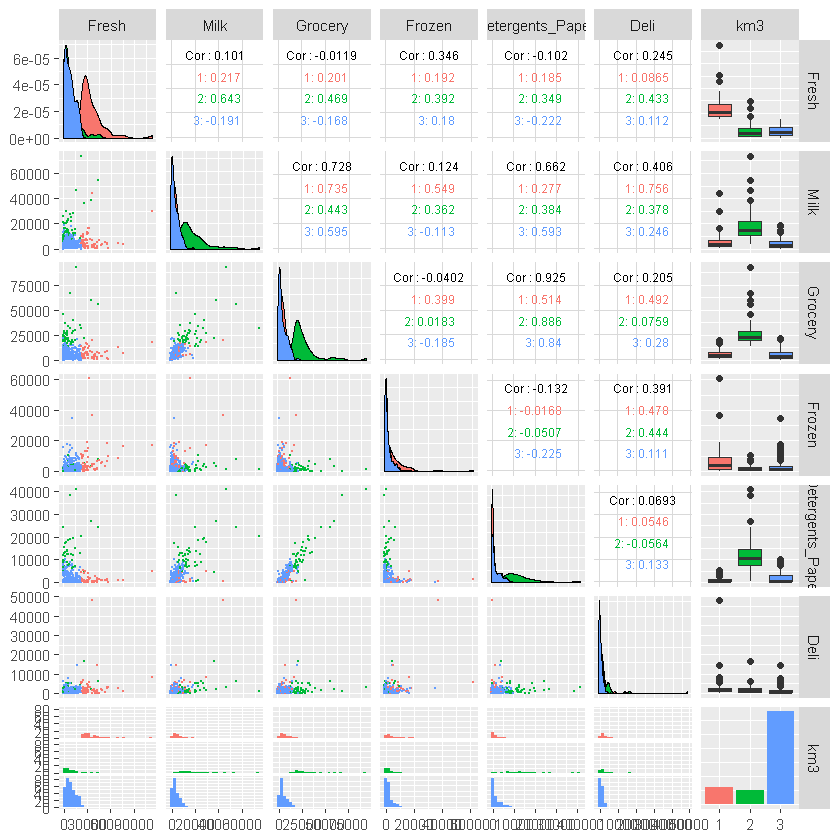

In [29]:
data_to_cluster <- subset(data_to_cluster, select = -c(km2))
km3 <- kmeans(data_to_cluster, 3, nstart = 20); 
data_to_cluster['km3'] <- as.factor(km3$cluster)
ggpairs(data = data_to_cluster,
        mapping = aes(color = km3),
        upper = list(continuous = wrap(ggally_cor, size = 2.5, alignPercent = 0.8)),
        lower = list(continuous = wrap(ggally_points, cex = .1))
        )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


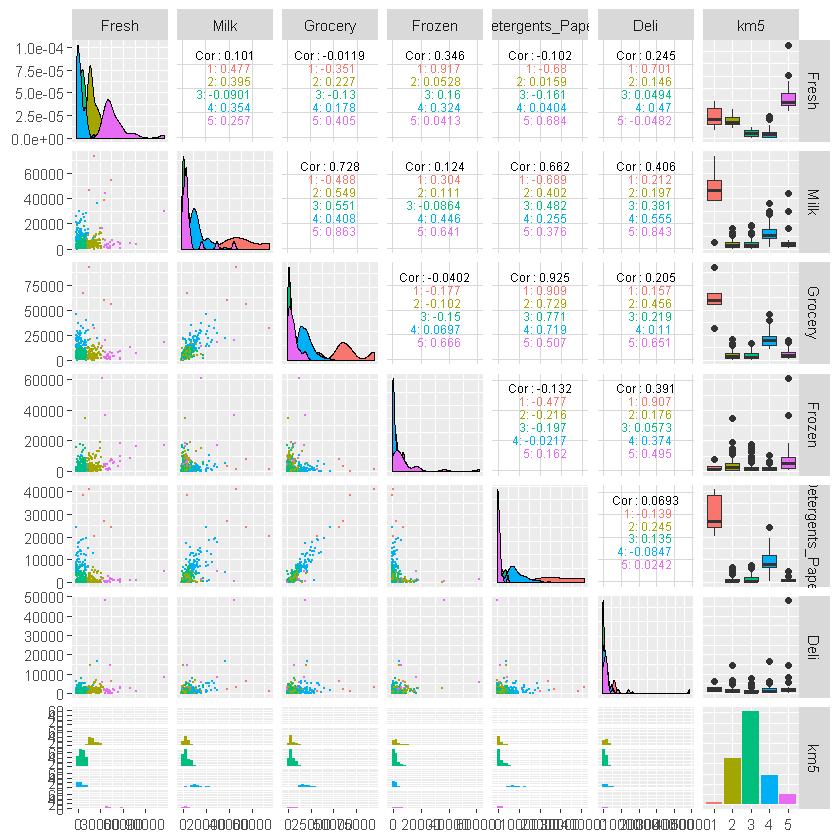

In [30]:
data_to_cluster <- subset(data_to_cluster, select = -c(km3))
km5 <- kmeans(data_to_cluster, 5, nstart = 20); 
data_to_cluster['km5'] <- as.factor(km5$cluster)
ggpairs(data = data_to_cluster,
        mapping = aes(color = km5),
        upper = list(continuous = wrap(ggally_cor, size = 2.5, alignPercent = 0.8)),
        lower = list(continuous = wrap(ggally_points, cex = .1))
        )

In [ ]:
data_to_cluster <- subset(data_to_cluster, select = -c(km5))

### Sum of Squares

In [113]:
clus <- 2:5
WSS <- sapply(clus, function(k) {
  kmeans(data_to_cluster, centers = k)$tot.withinss
})

BSS <- sapply(clus, function(k) {
  kmeans(data_to_cluster, centers = k)$betweenss
})


TSS <- sapply(clus, function(k) {
  kmeans(data_to_cluster, centers = k)$totss
})


In [48]:
SS <- cbind(WSS, BSS, TSS); rownames(SS) <- clus

In [57]:
SS <- as.data.frame(SS)

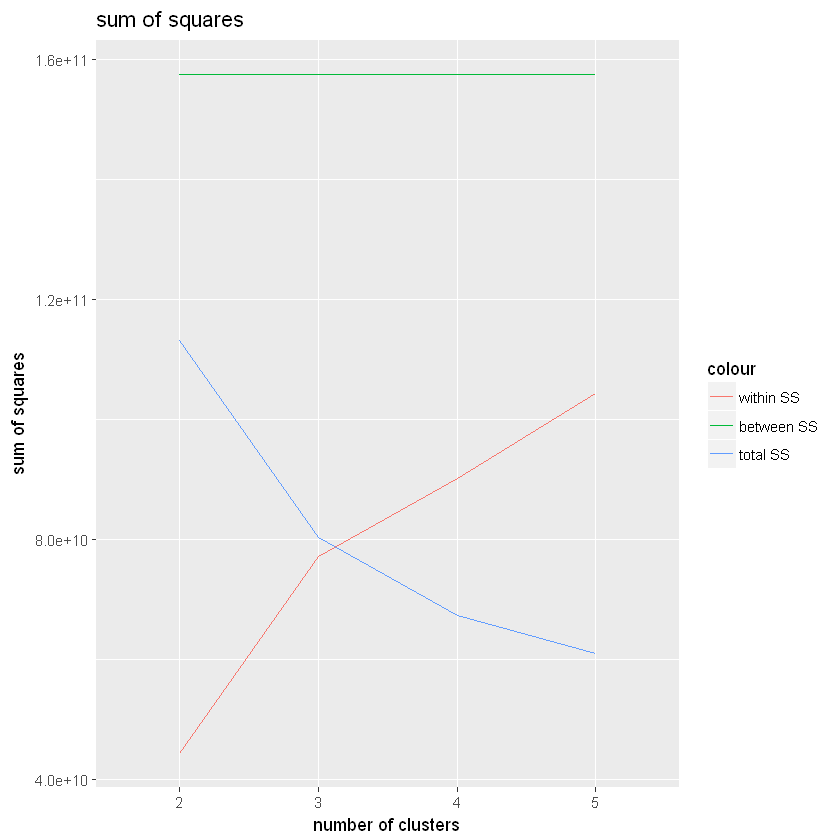

In [85]:
ggplot(data = SS, aes(x = rownames(SS), group = 1)) + 
    geom_line(aes(y = WSS, col = 'r')) +
    geom_line(aes(y = BSS, col = 'b')) +
    geom_line(aes(y = TSS, col = 'k')) +
    labs(title = 'sum of squares', x = 'number of clusters', y='sum of squares') +
    scale_color_discrete(labels = c('within SS', 'between SS', 'total SS'))

#### Herarchical Clustering

The `hclust()`fn implements hierarchical clustering in R. In the following eg, we plot the hierarchical clusterg dendrogram usg complete, single, and avg linkage clusterg, w/ Euclidean distance as the dissimilarity measure. We begin by clusterg obs usg complete linkage. The `dist()` fn is used to compute the inter-observatn Euclidean distance matrix. 
    
 Summary of Four Most Commonly-Used Types of Linkage in Hierarchical Clustering

| linkage | distance between clusters equals | notes |
|----------|----------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| complete | max(all pairwise dissimilarities btwn the observations in cluster A & observations in cluster B); maximal intercluster dissimilarity                     |  |
| single | min(" "); minimal intercluster dissimilarity |  |
| average | avg(" " ); mean intercluster dissimilarity |  |
| centroid | dissimilarity btwn the centroid for cluster A and the centroid for cluster B. | can result in undesirable *inversions*; inversions occur when two clusters are fused @ a height below either of the individual clusters in the dendogram. This can lead to difficulties in visualization as well as interpretatn of the dendogram.  |

In [90]:
dist(data_to_cluster)

              1           2           3           4           5           6
2     6206.2564                                                            
3     9405.5074   6506.3721                                                
4    11238.1896  13062.9542  13395.2184                                    
5    12098.9512  16899.2074  16988.5181  11549.4786                        
6     4412.7184   5589.1454   7941.3334  10011.9956  14532.7860            
7     6576.3101   8905.3930  11064.0631   7514.3436  12253.3247   6248.7780
8     7451.1706   4948.4843   6914.6619  10222.7357  15669.6844   6110.7508
9     9178.7085   7476.0705   9299.9462  10074.9151  17699.1195   5903.8885
10   14094.1677  10345.2103  13437.4014  21000.5747  22218.7504  15530.5437
11   12748.7893   7668.7607   9785.0314  15041.3733  20823.1105  11740.1779
12    9430.2354  12134.9447  13376.5597   5159.3847  12037.3475   8260.6459
13   19784.0804  24958.1619  26473.6376  23895.3142  13190.1584  23758.6573
14   12850.4

In [91]:
hc.complete <- hclust(dist(data_to_cluster), method = 'complete')
hc.avg <- hclust(dist(data_to_cluster), method = 'average')
hc.single <- hclust(dist(data_to_cluster), method = 'single')

We can not plot the dendograms obtained using the usual `plot()` fn. The numbers at the bottom of the plot identify each observation.

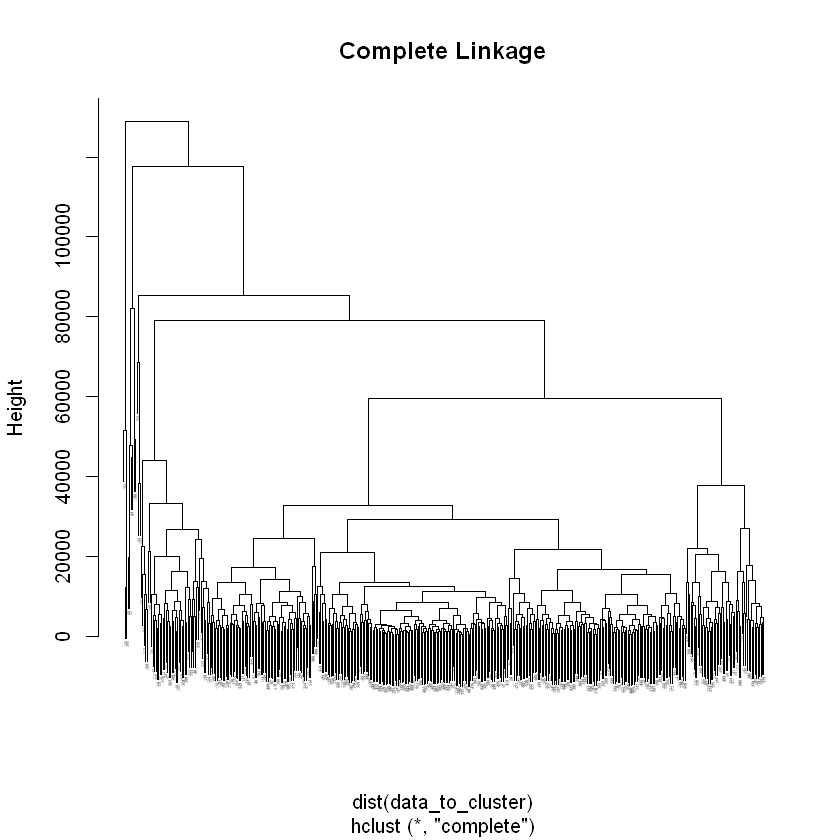

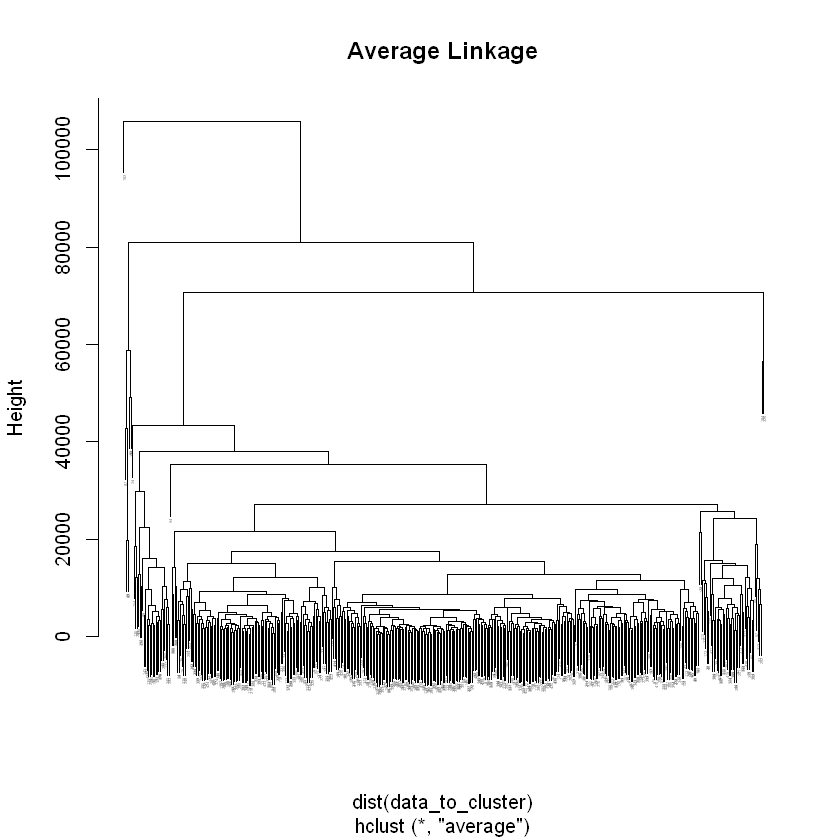

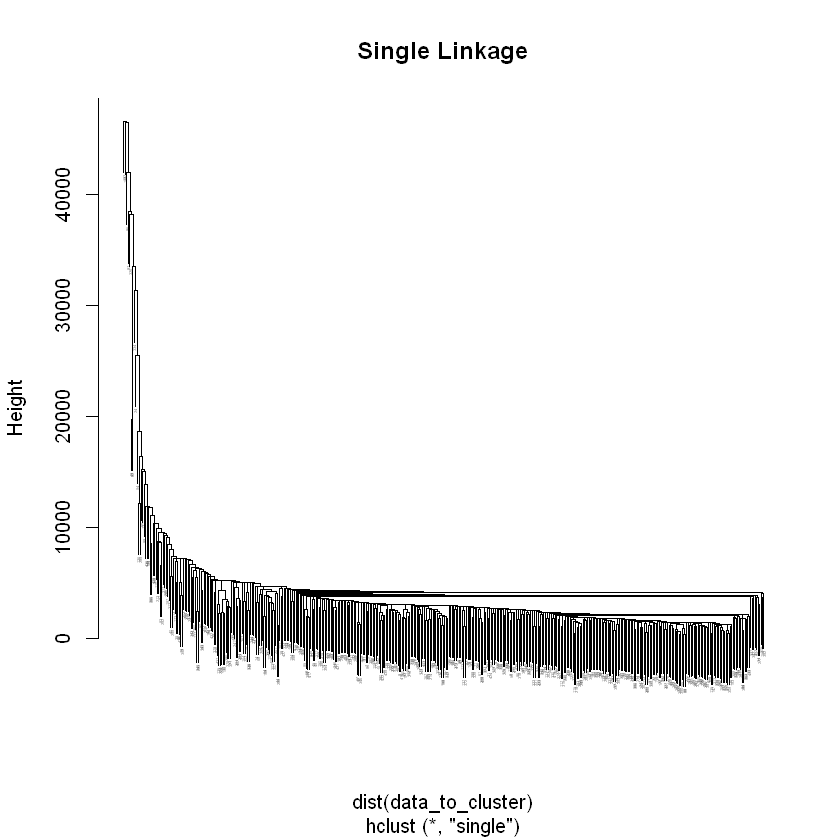

In [95]:
plot(hc.complete, main = 'Complete Linkage', cex = 0.2)
plot(hc.avg, main = 'Average Linkage', cex = 0.2)
plot(hc.single, main = 'Single Linkage', cex = 0.2)

To determine the cluster labels for each observation associated w/ a given cut of the dendogram, we can use the `cutree()` fn. We should check for singletons, that is groups/clusters with only one member.  Singletons aren't good.
`k` = number of groups

In [102]:
table(cutree(tree = hc.complete, k = 2))


  1   2 
437   3 

Cutting at level two on clustering using average-linkage or single-linkage gives us a singleton.

In [103]:
table(cutree(hc.avg, 2))


  1   2 
439   1 

In [105]:
table(cutree(hc.single, 2))


  1   2 
439   1 

#### Correlation-Based Dissimilarity 
The simplest way to measure dissimilarity is to use the Euclidean distance. Sometimes, correlation-based distance may be more appropriate and can be computed using as.dist() which converts an arbritrary square symmetric matrix into a form that the hclust() fn recognizes as a distance matrix.  

Two observations may be dissimilar in terms of Euclidean distance but similar in terms of correlation. This may be especially useful and noteworthy when performing customer segmentation. In customer segmentation, we may want to identify groups of similar shoppers with similar shopping histories that will respond to targeted ads. Using a correlation-based dissimilarity measure, we can group shoppers by types of items bought rather than how many items bought. The Euclidean-based dissimilarity measure will cluster shoppers who have bought very few items.

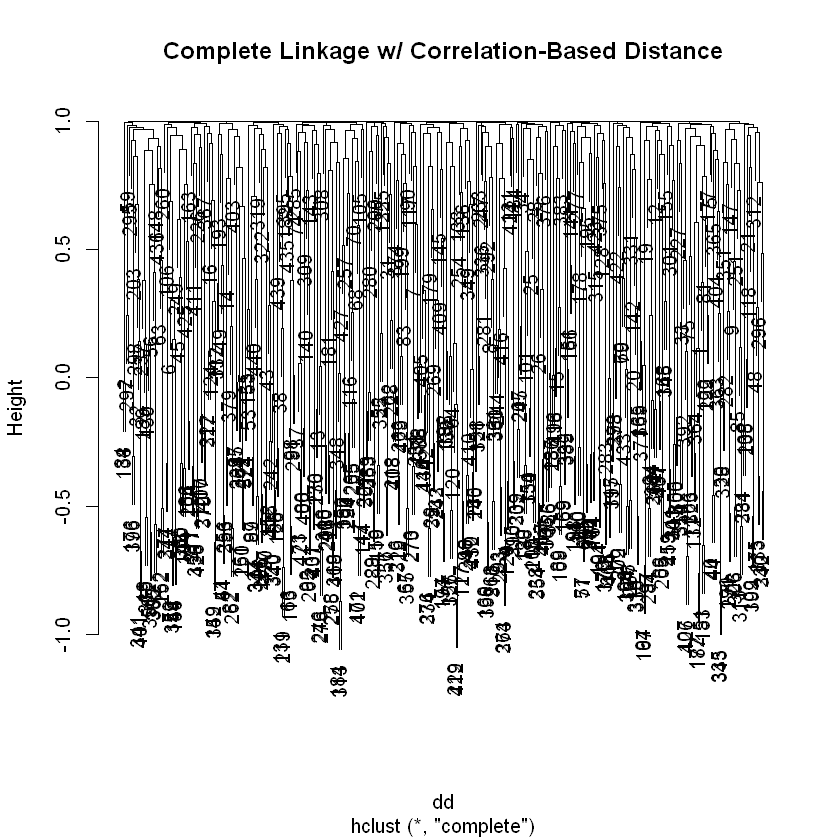

In [106]:
dd <- as.dist(cor(t(data_to_cluster)))
plot(hclust(dd, method = 'complete'), main = 'Complete Linkage w/ Correlation-Based Distance')

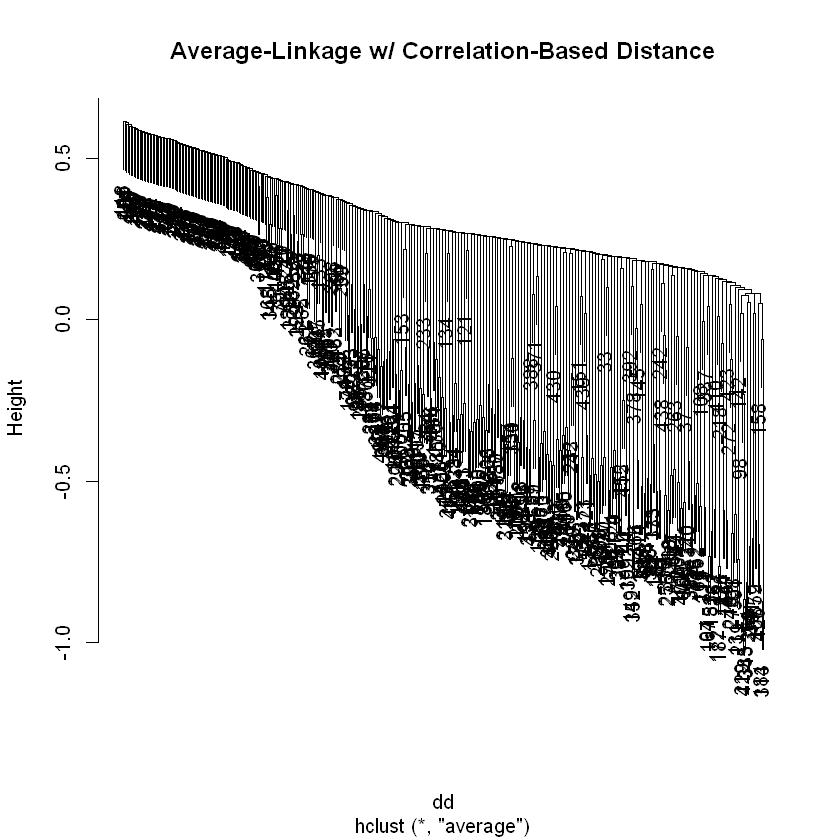

In [108]:
plot(hclust(dd, method = 'average'), main = 'Average Linkage w/ Correlation-Based Distance')

##### Why Not Scale Variables?
It can be a good idea to scale your variables before peforming hierarchical clusterg of the observations. It is not necessary in this case because each feature is using the same units, monetary units. 

# Take-Away
As we have seen, cluster modeling can provide insights into customers and their buying habits. It can inform us when building targeted marketing stratgies using the profiles of each cluster.